# Dip picking
### We suppose that the well has a diameter of 8.5 inches

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import math

## Parameters

In [48]:
absent_value = -9999.0

## Data Loading

In [51]:
imageInput = np.load('FMI_STAT_5010_5110.npy')
num_rows_total, num_columns_total = imageInput.shape
print(imageInput.shape)
tdep = np.load('TDEP_5010_5110.npy')
print(tdep.shape)


(12001, 360)
(12001,)


### Visualization

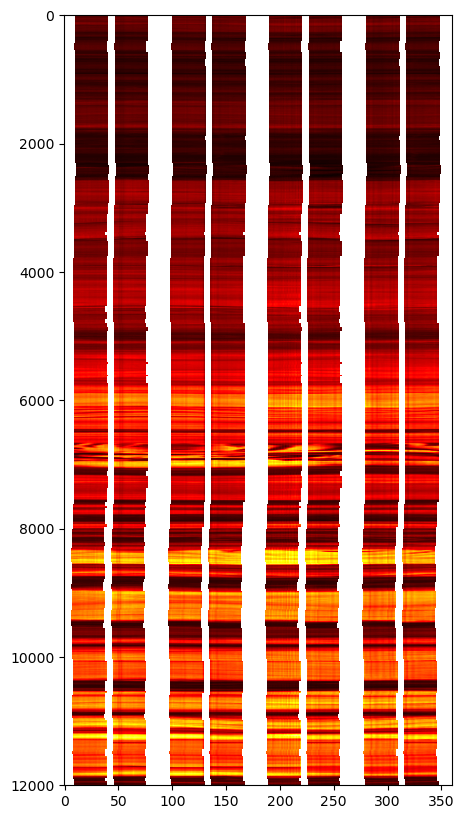

-9999.0


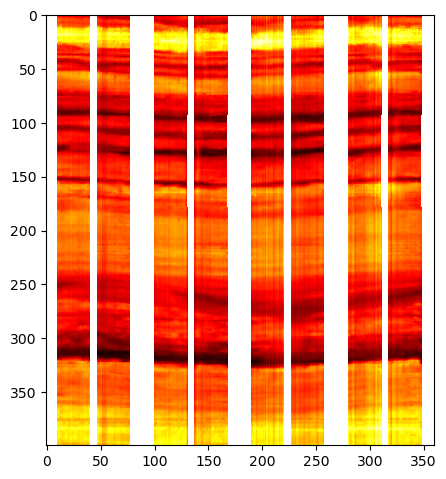

-9999.0


In [50]:
imageDisplay = np.copy(imageInput)
mask_absent = (imageInput == absent_value)
imageDisplay[mask_absent] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(5, 10))
ax.imshow(imageDisplay, 'hot', aspect='auto')
plt.show()
print(np.min(imageInput.flatten()))

start = 600
end = 1000
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
ax.imshow(imageDisplay[start:end, :], 'hot')


plt.show()
print(np.min(imageInput.flatten()))

In [105]:

gradXn.shape

(12001, 360, 1)

In [170]:
np.max(imageInput)

411389.125

In [131]:
gradX, gradY = np.gradient(imageInput)
gradXn = np.expand_dims(gradX, axis=2)
gradYn = np.expand_dims(gradY, axis=2)
grad_array = np.concatenate((gradXn, gradYn),axis=2)
grad_rotate_array=np.zeros((num_rows_total, num_columns_total,2))
for i in range(num_rows_total):
    for j in range(num_columns_total):
        grad_rotate_array[i,j]=np.matmul(R,grad_array[i,j])

In [300]:
def to_3d(z,phi):
    return np.array([np.cos(phi), np.sin(phi), -z])

def compute_vector(row, col):
    grad=grad_rotate_array[row,col]

    M = grad[0], grad[1]
    Mprimex = row + grad[0]
    Mprimey = col + grad[1]
    Mprime = Mprimex,Mprimey

    Mprime_3d = to_3d(grad[0],grad[1])
    M_3d = to_3d(Mprimex,Mprimey)
    vector = Mprime_3d - M_3d
    return vector


In [425]:
max_norm = 0
nb = 0
for i in range(300):
    rand_row = randint(0,num_rows_total-1)
    rand_col = randint(0,num_columns_total-1)
    counter = 0
    while imageInput[rand_row,rand_col]==-9999:
        counter+=1
        rand_row = randint(0,num_rows_total-1)
        rand_col = randint(0,num_columns_total-1)
    
    vector1 = compute_vector(rand_row,rand_col)


    for j in range(300):
        rand_row_2 = randint(0,num_rows_total-1)
        rand_col_2 = randint(0,num_columns_total-1)
        counter = 0
        while imageInput[rand_row_2,rand_col_2]==-9999:
            counter+=1
            rand_row_2 = randint(0,num_rows_total-1)
            rand_col_2 = randint(0,num_columns_total-1)
        
        vector2 = compute_vector(rand_row_2,rand_col_2)
        cross = np.cross(vector1, vector2)
        if np.linalg.norm(cross) > max_norm:
            nb+=1
            max_norm = np.linalg.norm(cross)
            max_vector1 = vector1
            max_vector2 = vector2
            max_coord1 = rand_row, rand_col
            max_coord2 = rand_row_2, rand_col_2

    

In [428]:
max_vector2

array([ 5.36759295e-01, -1.76361786e+00,  1.18120000e+04])

In [443]:
angle_2 = np.arctan(max_vector2[1]/max_vector2[0])
#angle_2 = np.rad2deg(np.arctan(vector2[1]/vector2[0]))
#if angle_2<0:
#    angle_2+=360


angle_1 = np.arctan(max_vector1[1]/max_vector1[0])#np.rad2deg(np.arctan(vector1[1]/vector1[0]))
#if angle_1<0:
#    angle_1+=360
      
angle_2


#delta = np.arccos(np.dot(cross,np.array([0,0,1]))/(np.linalg.norm(cross)))#*180/np.pi
cross_norm = cross/np.linalg.norm(cross)
delta = np.arccos(cross_norm[2])
alpha = np.arccos(cross_norm[0]/np.sin(delta))
delta

1.5707895222402715

In [438]:
num_rows_total

12001

In [444]:
Z0 = -max_vector1[2] - np.tan(delta)*np.cos(angle_1-alpha)
Z0
Z0 = -max_vector2[2] - np.tan(delta)*np.cos(angle_2-alpha)
Z0

104919.76137002077

## Sinusoid extraction: automated trend extraction using randomized hough transform
Implement randomized Hough transform:
-  Compute gradient of image and associated vectors
-  Display the vectors
-  Pick randomly vectors and compute their vectorial product; store them in an accumulator
-  Take the most probable vector
-  Compute the associated angles
-  Display the associated sinusoid

0.5690452495143127

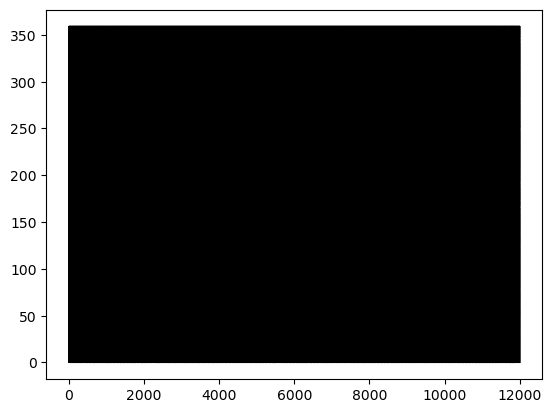

In [20]:
X,Y=np.meshgrid(np.arange(0,imageInput.shape[0]),np.arange(0,imageInput.shape[1]))
graddat=np.gradient(imageInput)

plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])
plt.show()

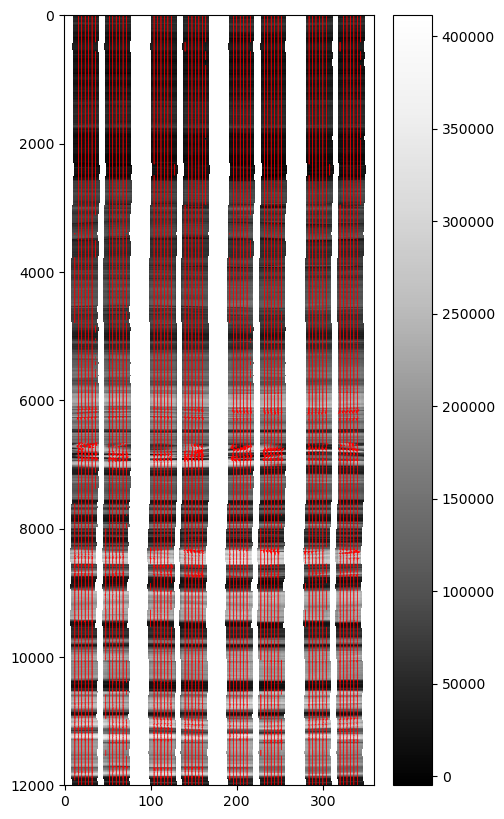

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


flat_image = imageDisplay
r, c = np.shape(flat_image)
gd = 4

test_slice = flat_image[::gd,::gd]

fig,ax=plt.subplots(1,1, figsize=(5, 10))
the_image = ax.imshow(
                flat_image,
                zorder=0,alpha=1.0,
                cmap="Greys_r",
                origin="upper",
                interpolation="hermite", aspect='auto'
            )
plt.colorbar(the_image)            
Y, X = np.mgrid[0:r:gd, 0:c:gd]
dY, dX = np.gradient(test_slice)
ax.quiver(X, Y, dX, dY, color='r')


plt.show()

In [39]:
prod_vect_list=[]
grad_list=[]
for i in range(50):
    
    x1=randint(0, r)
    y1=randint(0, c)
    x2=randint(0, r)
    y2=randint(0, c)
    grad1=grad[0][x1,y1],grad[1][x1,y1]
    grad2=grad[0][x2,y2],grad[1][x1,y1]
    prod_vect=np.cross(grad1,grad2)
    prod_vect_list.append(prod_vect)
    grad_list.append((grad1, grad2))



In [36]:
from random import *
randint(0,1)

1

## Sinusoid extraction: automated trend extraction using classical optimization
-  Formalize the problem with classical optimization: you are looking for a pole vector that is perpendicular to the segment vectors, in 3d
-  Compare the results with the Hough transform

## Evaluate the improvement with morphology operations (optional)
-  Select the pixels corresponding to interesting shapes
-  Remove the artifacts

In [45]:
np.array(range(0,1))

array([0])

indice de row = z
indice de colonne = 360 degré = 2pi = angle azimut phi = indice de colle * 2pi/nombre de colonne 
on doit etre en 3d et après on doit faire le produit vectoriel sur ce qui est en 3D
quand on a un vecteur, comment on se ramène à deux angles ?
il faut se ramener à deux angles avant d'aggréger

deux fonctions

compute x,y from coordinate

compute from x,y,z


pour le pb d'optimisation:
ce qu'il veut c'est pas la position du point mais la direction (trend: dip et azimut)

j'essaie de trouver le vecteur tel que le produit scalaire de ce vecteur avec tous les vecteurs soit minimal

on optimise sur le vecteur final: argmin de telle sorte qu'on minimise la somme des produits scalaires, si on doit trouver le pole p, la somme de tous les gradients au carré

les tangentes sont censees etre orthogonales à la normale au plan

slide 8 du dernier cours